# Retrival based chatbots

In sheer number, retrieval-based chatbots are the most popular chatbot implementation in use today. This popularity is due in large part to the strength of retrieval-based bots in closed-domain conversations — conversations that are clearly limited in scope.  All chatbots need to do:

Standard chatbot system architecture, which includes four main steps:

- When a chatbot receives a user message, intent classification and entity recognition programs are immediately run in tandem.
- The results from both of these tasks are then fed into a candidate response generator. In a retrieval-based chatbot system, response generation relies on a database of predefined responses. Using the results from entity recognition and intent classification tasks, a set of possibly similar chatbot responses are retrieved from the database.
- After the selection of a set of candidate responses, a final response selection program ranks and selects the “best fit” response to be returned to the user.

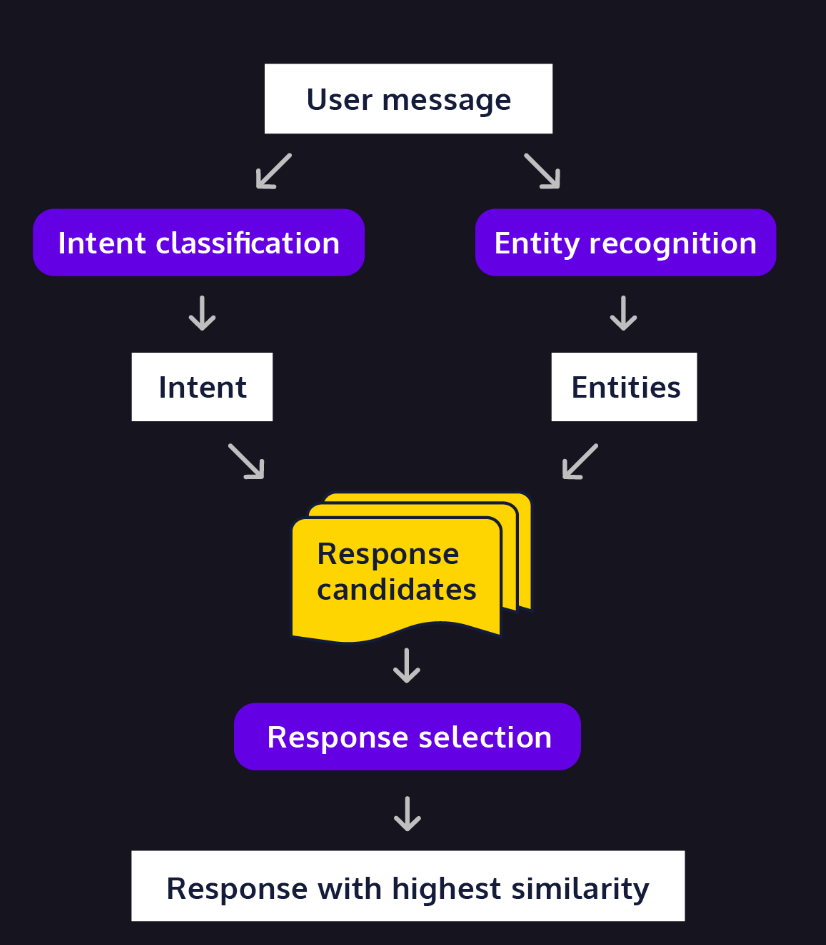

## Intent woth Bag of Words Model - BOW

BOW model returns each word and a count of it's frequency

A simple BoW model is best-fit for a situation where the order of words does not contain much information about the intent of a user’s message. In these situations, the unique collection of words in a message often reveals a lot of information about the user’s concern and provides a simple, yet powerful metric to quantify similarity.

## Intent with TF-IDF

Term frequency–inverse document frequency (tf-idf), puts emphasis on the relative frequency in which a term occurs within a possible response and the user message. Generally, tf-idf is best suited for domains where the most important terms in an input or response are mentioned repeatedly.

## Entity Recognition with POS Tagging

After determining the best method for the classification of a user’s intent, chatbot architects set upon the task of recognizing entities within a user’s message.

Part of speech (POS) tagging is commonly used to identify entities within a user message, as most entities are nouns 

nltk’s pos_tag() function can rapidly tag a tokenized sentence and return a list of tuple objects for use in entity recognition tasks. A sentence, like “Jack and Jill went up the hill,” when tokenized and supplied in a call to pos_tag(), outputs a list of tuple objects. We can extract words tagged as a noun, represented in nltk‘s tagging schema as a collection of tags beginning with “NN,” by checking if the string “NN” occurs in the token tag, and then appending the token string to a list of nouns if True:

In [6]:
tagged_message = [('Jack', 'NNP'), ('and', 'CC'), ('Jill', 'NNP'), ('went', 'VBD'), ('up', 'RP'), ('the', 'DT'), ('hill', 'NN')]

message_nouns = []

for token in tagged_message:
  if "NN" in token[1]:
     message_nouns.append(token[0])

## Entity recognition with word embeddings

While POS tagging allows us to extract key entities in a user message, it does not provide context that allows a chatbot to believably integrate an entity reference into a predefined response.

A retrieval-based chatbot’s collection of predefined responses is very similar to an empty Madlibs story. Each response is a complete sentence, but with many key words replaced with blank spots. Unlike Madlibs, these blanks will be labeled with a reference to a broad kind of entity. For instance, a predefined response for a weather report chatbot might look like:

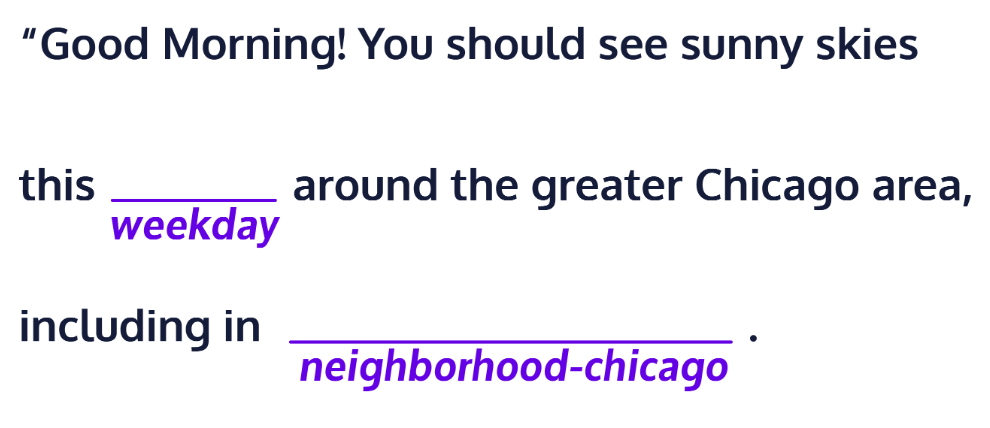

Chatbot architects often use word embedding models, like word2vec, to rank the similarity of user-provided entities and the broad category associated with a response “blank spot”

In [11]:
import re
from collections import Counter
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
import spacy
word2vec = spacy.load("en_core_web_sm")

def preprocess(input_sentence):
    input_sentence = input_sentence.lower()
    input_sentence = re.sub(r'[^\w\s]','',input_sentence)
    tokens = word_tokenize(input_sentence)
    input_sentence = [i for i in tokens if not i in stop_words]
    return(input_sentence)

def compare_overlap(user_message, possible_response):
    similar_words = 0
    for token in user_message:
        if token in possible_response:
              similar_words += 1
    return similar_words
  
def extract_nouns(tagged_message):
    message_nouns = list()
    for token in tagged_message:
        if token[1].startswith("N"):
            message_nouns.append(token[0])
    return message_nouns

def compute_similarity(tokens, category):
    output_list = list()
    for token in tokens:
        output_list.append([token.text, category.text, token.similarity(category)])
    return output_list


user_message = "Good morning... will it rain in Chicago later this week?"

blank_spot = "illinois city"
response_a = "The average temperature this weekend in {} with be 88 degrees. Bring your sunglasses!"
response_b = "Forget about your umbrella; there is no rain forecasted in {} this weekend."
response_c = "This weekend, a warm front from the southeast will keep skies near {} clear."
responses= [response_a, response_b, response_c]

class ChatBot:
  def find_intent_match(self, responses, user_message):
    bow_user_message = Counter(preprocess(user_message))
    processed_responses = [Counter(preprocess(response)) for response in responses]
    # define similarity_list here:
    similarity_list = [compare_overlap(doc, bow_user_message) for doc in processed_responses]
    # define response_index:
    response_index = similarity_list.index(max(similarity_list))
    return responses[response_index]
    
  def find_entities(self, user_message):
    tagged_user_message = pos_tag(preprocess(user_message))
    message_nouns = extract_nouns(tagged_user_message)
    
    # execute word2vec model here:
    tokens = word2vec(" ".join(message_nouns))
    category = word2vec(blank_spot)
    word2vec_result = compute_similarity(tokens, category)
    word2vec_result.sort(key=lambda x: x[2])
    return word2vec_result[-1][0]

  # define .respond() here:
  def respond(self, user_message):
    best_response = self.find_intent_match(responses, user_message)
    entity = self.find_entities(user_message)
    print(best_response.format(entity))
    
  def chat(self):
    user_message = input("Hi, I'm Stratus. Ask me about your local weather!\n")
    self.respond(user_message)

# create ChatBot() instance:
stratus = ChatBot()
# call .chat() method:
stratus.chat()




Forget about your umbrella; there is no rain forecasted in rain this weekend.


C:\Users\alan_\AppData\Local\Temp\ipykernel_5924\674255042.py:34: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  output_list.append([token.text, category.text, token.similarity(category)])


- Retrieval-based chatbots are used in closed-domain scenarios and rely on a collection of predefined responses to a user message. A retrieval-based bot completes three main tasks: intent classification, entity recognition, and response selection.
- There are a number of ways to determine which response is the best fit for a given user message. One of the most important decisions a chatbot architect makes is the selection of a similarity metric.
- Bag-of-Words (BoW) models are commonly used to compute intent similarity measures based on word overlap.
- Term frequency–inverse document frequency (tf-idf) is another common similarity metric which incorporates the relative frequency of terms across the collection of possible responses. The sklearn package provides a TfidfVectorizer() object that we can use to fit tf-idf models. *Entity recognition tasks often extract proper nouns from a user message using - Part of Speech (POS) tagging. POS tagging can be performed with nltk’s .pos_tag() method. *It’s often helpful to imagine pre-defined chatbot responses as a kind of MadLibs story. We can use word embeddings models, like the one implemented in the spacy package, to insert entities into response objects based on their cosine similarity with abstract, “blank-spot” concepts. *The final response selection relies on results from both intent classification and entity recognition tasks in order to produce a coherent response to the user message.